# Pose Detection with OpenPose

This notebook uses an open source project [CMU-Perceptual-Computing-Lab/openpose](https://github.com/CMU-Perceptual-Computing-Lab/openpose.git) to detect/track multi person poses on a given youtube video.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).

## Install OpenPose

In [1]:
import os
from os.path import exists, join, basename, splitext
from IPython.display import YouTubeVideo

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]

if not exists(project_name):
    # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
    # install new CMake becaue of CUDA10
    !sudo wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
    !sudo tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
    # clone openpose
    !sudo git clone -q --depth 1 $git_repo_url
    !sudo sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
    # install system dependencies
    !sudo apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
    # install python dependencies
    !sudo pip install -q youtube-dl
    # build openpose
    !cd openpose && sudo rm -rf build || true && sudo mkdir build && cd build && sudo cmake .. && sudo make -j`nproc`

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- GCC detected, ad

[  1%] Linking CXX static library ../../lib/libcaffeproto.a
[  1%] Built target caffeproto
[  1%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/util/cuda_compile_1_generated_math_functions.cu.o
[  1%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_absval_layer.cu.o
[  1%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_accuracy_layer.cu.o
[  2%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_base_data_layer.cu.o
[  2%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_batch_norm_layer.cu.o
[  2%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_batch_reindex_layer.cu.o
[  2%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_bnll_layer.cu.o
[  4%]

[ 21%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_recurrent_layer.cu.o
[ 21%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_reduction_layer.cu.o
[ 23%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_relu_layer.cu.o
[ 23%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_scale_layer.cu.o
[ 23%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_sigmoid_cross_entropy_loss_layer.cu.o
[ 24%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_sigmoid_layer.cu.o
[ 24%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cuda_compile_1_generated_silence_layer.cu.o
[ 26%] Building NVCC (Device) object src/caffe/CMakeFiles/cuda_compile_1.dir/layers/cu

[ 61%] Building CXX object src/caffe/CMakeFiles/caffe.dir/layers/multinomial_logistic_loss_layer.cpp.o
[ 61%] Building CXX object src/caffe/CMakeFiles/caffe.dir/layers/mvn_layer.cpp.o
[ 63%] Building CXX object src/caffe/CMakeFiles/caffe.dir/layers/neuron_layer.cpp.o
[ 63%] Building CXX object src/caffe/CMakeFiles/caffe.dir/layers/parameter_layer.cpp.o
[ 64%] Building CXX object src/caffe/CMakeFiles/caffe.dir/layers/pooling_layer.cpp.o
[ 64%] Building CXX object src/caffe/CMakeFiles/caffe.dir/layers/power_layer.cpp.o
[ 64%] Building CXX object src/caffe/CMakeFiles/caffe.dir/layers/prelu_layer.cpp.o
[ 65%] Building CXX object src/caffe/CMakeFiles/caffe.dir/layers/recurrent_layer.cpp.o
[ 65%] Building CXX object src/caffe/CMakeFiles/caffe.dir/layers/reduction_layer.cpp.o
[ 65%] Building CXX object src/caffe/CMakeFiles/caffe.dir/layers/relu_layer.cpp.o
[ 67%] Building CXX object src/caffe/CMakeFiles/caffe.dir/layers/reshape_layer.cpp.o
[ 67%] Building CXX object src/caffe/CMakeFiles/caffe

-- Python interface is disabled or not all required dependencies found. Building without it...
-- 
-- ******************* Caffe Configuration Summary *******************
-- General:
--   Version           :   1.0.0
--   Git               :   1.0-149-g1807aada
--   System            :   Linux
--   C++ compiler      :   /usr/bin/c++
--   Release CXX flags :   -O3 -DNDEBUG -fPIC -Wall -std=c++11 -Wno-sign-compare -Wno-uninitialized
--   Debug CXX flags   :   -g -fPIC -Wall -std=c++11 -Wno-sign-compare -Wno-uninitialized
--   Build type        :   Release
-- 
--   BUILD_SHARED_LIBS :   ON
--   BUILD_python      :   OFF
--   BUILD_matlab      :   OFF
--   BUILD_docs        :   OFF
--   CPU_ONLY          :   OFF
--   USE_OPENCV        :   OFF
--   USE_LEVELDB       :   OFF
--   USE_LMDB          :   OFF
--   USE_NCCL          :   OFF
--   ALLOW_LMDB_NOLOCK :   OFF
--   USE_HDF5          :   ON
-- 
-- Dependencies:
--   BLAS              :   Yes (Atlas)
--   Boost             :   Yes (ver. 1.

-- Installing: /home/ubuntu/CCTV/openpose/build/caffe/include/caffe/net.hpp
-- Installing: /home/ubuntu/CCTV/openpose/build/caffe/include/caffe/parallel.hpp
-- Installing: /home/ubuntu/CCTV/openpose/build/caffe/include/caffe/internal_thread.hpp
-- Installing: /home/ubuntu/CCTV/openpose/build/caffe/include/caffe/layer_factory.hpp
-- Installing: /home/ubuntu/CCTV/openpose/build/caffe/include/caffe/util
-- Installing: /home/ubuntu/CCTV/openpose/build/caffe/include/caffe/util/insert_splits.hpp
-- Installing: /home/ubuntu/CCTV/openpose/build/caffe/include/caffe/util/io.hpp
-- Installing: /home/ubuntu/CCTV/openpose/build/caffe/include/caffe/util/nccl.hpp
-- Installing: /home/ubuntu/CCTV/openpose/build/caffe/include/caffe/util/hdf5.hpp
-- Installing: /home/ubuntu/CCTV/openpose/build/caffe/include/caffe/util/cudnn.hpp
-- Installing: /home/ubuntu/CCTV/openpose/build/caffe/include/caffe/util/db.hpp
-- Installing: /home/ubuntu/CCTV/openpose/build/caffe/include/caffe/util/db_leveldb.hpp
-- Install

-- Generating done
-- Build files have been written to: /home/ubuntu/CCTV/openpose/build
[  0%] Building NVCC (Device) object src/openpose/CMakeFiles/openpose.dir/tracking/openpose_generated_pyramidalLK.cu.o
[  0%] Building NVCC (Device) object src/openpose/CMakeFiles/openpose.dir/gpu/openpose_generated_cuda.cu.o
[  0%] Building NVCC (Device) object src/openpose/CMakeFiles/openpose.dir/face/openpose_generated_renderFace.cu.o
[  1%] Building NVCC (Device) object src/openpose/CMakeFiles/openpose.dir/hand/openpose_generated_renderHand.cu.o
[  1%] Building NVCC (Device) object src/openpose/CMakeFiles/openpose.dir/net/openpose_generated_nmsBase.cu.o
[  1%] Building NVCC (Device) object src/openpose/CMakeFiles/openpose.dir/net/openpose_generated_bodyPartConnectorBase.cu.o
[  1%] Building NVCC (Device) object src/openpose/CMakeFiles/openpose.dir/net/openpose_generated_maximumBase.cu.o
[  3%] Built target openpose_lib
[  4%] Building NVCC (Device) object src/openpose/CMakeFiles/openpose.dir/ne

[ 26%] Building CXX object src/openpose/CMakeFiles/openpose.dir/net/nmsBase.cpp.o
[ 26%] Building CXX object src/openpose/CMakeFiles/openpose.dir/net/nmsBaseCL.cpp.o
[ 26%] Building CXX object src/openpose/CMakeFiles/openpose.dir/net/nmsCaffe.cpp.o
[ 27%] Building CXX object src/openpose/CMakeFiles/openpose.dir/net/resizeAndMergeBase.cpp.o
[ 27%] Building CXX object src/openpose/CMakeFiles/openpose.dir/net/resizeAndMergeBaseCL.cpp.o
[ 27%] Building CXX object src/openpose/CMakeFiles/openpose.dir/net/resizeAndMergeCaffe.cpp.o
[ 28%] Building CXX object src/openpose/CMakeFiles/openpose.dir/pose/defineTemplates.cpp.o
[ 28%] Building CXX object src/openpose/CMakeFiles/openpose.dir/pose/poseCpuRenderer.cpp.o
[ 28%] Building CXX object src/openpose/CMakeFiles/openpose.dir/pose/poseExtractor.cpp.o
[ 29%] Building CXX object src/openpose/CMakeFiles/openpose.dir/pose/poseExtractorCaffe.cpp.o
[ 29%] Building CXX object src/openpose/CMakeFiles/openpose.dir/pose/poseExtractorNet.cpp.o
[ 29%] Build

[ 46%] Linking CXX executable openpose.bin
[ 46%] Built target openpose.bin
Scanning dependencies of target 13_asynchronous_custom_input_output_and_datum.bin
[ 46%] Building CXX object examples/tutorial_api_cpp/CMakeFiles/13_asynchronous_custom_input_output_and_datum.bin.dir/13_asynchronous_custom_input_output_and_datum.cpp.o
[ 46%] Linking CXX executable 01_body_from_image_default.bin
[ 46%] Linking CXX executable calibration.bin
[ 47%] Linking CXX executable 02_whole_body_from_image_default.bin
[ 47%] Linking CXX executable 04_keypoints_from_images.bin
[ 47%] Built target 01_body_from_image_default.bin
Scanning dependencies of target 08_heatmaps_from_image.bin
[ 47%] Built target calibration.bin
Scanning dependencies of target 16_synchronous_custom_postprocessing.bin
[ 47%] Building CXX object examples/tutorial_api_cpp/CMakeFiles/08_heatmaps_from_image.bin.dir/08_heatmaps_from_image.cpp.o
[ 47%] Building CXX object examples/tutorial_api_cpp/CMakeFiles/16_synchronous_custom_postproces

[ 66%] Building CXX object src/openpose/filestream/CMakeFiles/openpose_filestream.dir/cocoJsonSaver.cpp.o
[ 66%] Building CXX object src/openpose/tracking/CMakeFiles/openpose_tracking.dir/personIdExtractor.cpp.o
[ 67%] Building CXX object src/openpose/filestream/CMakeFiles/openpose_filestream.dir/defineTemplates.cpp.o
Scanning dependencies of target openpose_gpu
[ 67%] Building CXX object src/openpose/gpu/CMakeFiles/openpose_gpu.dir/cuda.cpp.o
Scanning dependencies of target openpose_hand
Scanning dependencies of target openpose_face
[ 67%] Building CXX object src/openpose/hand/CMakeFiles/openpose_hand.dir/defineTemplates.cpp.o
[ 67%] Building CXX object src/openpose/face/CMakeFiles/openpose_face.dir/defineTemplates.cpp.o
[ 68%] Building CXX object src/openpose/gpu/CMakeFiles/openpose_gpu.dir/gpu.cpp.o
[ 68%] Building CXX object src/openpose/filestream/CMakeFiles/openpose_filestream.dir/fileSaver.cpp.o
[ 68%] Building CXX object src/openpose/tracking/CMakeFiles/openpose_tracking.dir/pe

[ 86%] Built target openpose_unity
[ 86%] Building CXX object src/openpose/net/CMakeFiles/openpose_net.dir/resizeAndMergeBaseCL.cpp.o
[ 87%] Linking CXX shared library libopenpose_filestream.so
[ 87%] Built target openpose_filestream
Scanning dependencies of target openpose_producer
[ 87%] Building CXX object src/openpose/net/CMakeFiles/openpose_net.dir/resizeAndMergeCaffe.cpp.o
[ 88%] Building CXX object src/openpose/producer/CMakeFiles/openpose_producer.dir/datumProducer.cpp.o
[ 88%] Built target 13_asynchronous_custom_input_output_and_datum.bin
[ 88%] Building CXX object src/openpose/producer/CMakeFiles/openpose_producer.dir/defineTemplates.cpp.o
[ 88%] Building CXX object src/openpose/producer/CMakeFiles/openpose_producer.dir/flirReader.cpp.o
[ 88%] Building CXX object src/openpose/producer/CMakeFiles/openpose_producer.dir/imageDirectoryReader.cpp.o
[ 89%] Linking CXX shared library libopenpose_hand.so
[ 89%] Building CXX object src/openpose/gui/CMakeFiles/openpose_gui.dir/frameDis

In [52]:
!sudo apt install ffmpeg

## Directory

```
Root 
  ㄴ---- .ipynb
  ㄴ---- openpose
  ㄴ---- video files(*.mp4)
  ㄴ---- output : json files
 ```

## Save coco pretrained model (for 18 joints)

In [27]:
!sudo cp ../pose_iter_440000.caffemodel ./openpose/models/pose/coco/

## Import Libraries

In [1]:
import os
from os.path import exists, join, basename, splitext  
from IPython.display import YouTubeVideo

## openpose shell command 

In [28]:
!cd openpose && ./build/examples/openpose/openpose.bin --help

openpose.bin: Warning: SetUsageMessage() never called

  Flags from /build/gflags-6Vsjoz/gflags-2.2.1/src/gflags.cc:
    -flagfile (load flags from file) type: string default: ""
    -fromenv (set flags from the environment [use 'export FLAGS_flag1=value'])
      type: string default: ""
    -tryfromenv (set flags from the environment if present) type: string
      default: ""
    -undefok (comma-separated list of flag names that it is okay to specify on
      the command line even if the program does not define a flag with that
      name.  IMPORTANT: flags in this list that have arguments MUST use the
      flag=value format) type: string default: ""

  Flags from /build/gflags-6Vsjoz/gflags-2.2.1/src/gflags_completions.cc:
    -tab_completion_columns (Number of columns to use in output for tab
      completion) type: int32 default: 80
    -tab_completion_word (If non-empty, HandleCommandLineCompletions() will
      hijack the process and attempt to do bash-style command line flag
  

## Detect poses on a test video (YOUTUBE)

We are going to detect poses on the following youtube video:

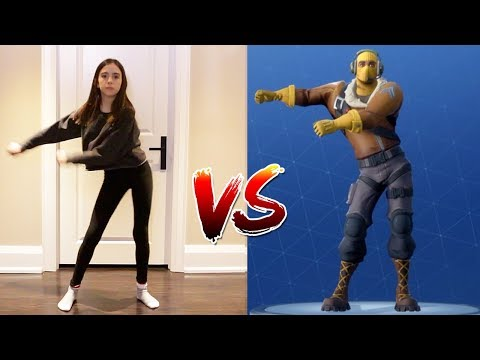

In [2]:
# YOUTUBE URL GET

YOUTUBE_ID = 'RXABo9hm8B8'

YouTubeVideo(YOUTUBE_ID)

### Download the above youtube video, cut the first 5 seconds and do the pose detection on that 5 seconds:

In [3]:
!rm -rf youtube.mp4

# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID

# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 5 video.mp4

[youtube] RXABo9hm8B8: Downloading webpage
[download] Destination: youtube.mp4
[download] 100% of 116.07MiB in 00:0642MiB/s ETA 00:000
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame 

In [4]:
# detect poses on the these 5 seconds
!rm openpose.avi 
!cd openpose && ./build/examples/openpose/openpose.bin --video ../video.mp4 --write_json ../Outputs/ --display 0  --write_video ../openpose.avi --model_pose COCO                                  

# convert the result into MP4
!ffmpeg -y -loglevel info -i openpose.avi output.mp4

rm: cannot remove 'openpose.avi': No such file or directory
Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 23.823711 seconds.
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-li

### Finally, visualize the result:

In [5]:
def show_local_mp4_video(file_name, width=640, height=480):

    import io
    import base64
    from IPython.display import HTML
    video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
    return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                        </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)

## Detect poses on a test video (CUSTOM)

예를 들어, 

초당 30프레임의 영상이 있고, 영상이 5초라면 총 프레임 수는 150이다.

따라서, json 파일도 150개가 생성된다.

```
(video_000_keypoints.json,
 video_002_keypoints.json,
 ...
 video_149_keypoints.json)
```

```
Root 
  ㄴ---- *.ipynb
  ㄴ---- openpose
  ㄴ---- Videos : input video files
  ㄴ---- Visualize : skeleton video files
  ㄴ---- Outputs : json files
 ```

In [83]:
if not os.listdir('./Visualize'):
    !mkdir Visualize

In [77]:
v_path = '../Videos/IMG_6709_720p.mp4' # video path
v_name = v_path.split('/')[-1][:-4] # video name
vi_path = './Visualize/' + v_name + '_skel'+ '.mp4' # skeleton video path

# # detect poses
!rm openpose.avi 
!cd openpose && ./build/examples/openpose/openpose.bin --video $v_path --write_json ../Outputs/ --display 0 --write_video ../openpose.avi --model_pose COCO


# !cd openpose && ./build/examples/openpose/openpose.bin : openpose 경로로 들어가서 bin파일을 옵션에 따라(--로 시작되는...) 실행(필수)
# --video $v_path    : 비디오 경로
# --write_json ../Outputs/    : json 저장 경로
# --display 0    : 시각적 출력이 필요하지 않은 경우 처리
# --write_video ../openpose.avi    : 시각화 비디오 저장 경로
# --model_pose COCO : pose를 COCO 형식(18개의 joints)로 추출

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Empty frame detected, frame number 217 of 232. In /home/ubuntu/CCTV/openpose/src/openpose/producer/producer.cpp:checkFrameIntegrity():290
Empty frame detected, frame number 217 of 232. In /home/ubuntu/CCTV/openpose/src/openpose/producer/producer.cpp:checkFrameIntegrity():290
Empty frame detected, frame number 217 of 232. In /home/ubuntu/CCTV/openpose/src/openpose/producer/producer.cpp:checkFrameIntegrity():290
OpenPose demo successfully finished. Total time: 35.804549 seconds.


In [78]:
# 잘되었나 보는 용도로만 사용, 볼 필요가 없을 경우 실행하지 않아도 됨

# convert the result into MP4
!ffmpeg -y -loglevel info -i openpose.avi $vi_path

def show_local_mp4_video(file_name, width=640, height=480):

    import io
    import base64
    from IPython.display import HTML
    video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
    return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                        </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video(vi_path, width=960, height=720)

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

## Extract json file without Visualize

In [88]:
v_path = '../Videos/IMG_6709_720p.mp4' # video path

# # detect poses!rm openpose.avi 
!cd openpose && ./build/examples/openpose/openpose.bin --video $v_path --write_json ../Outputs/ --display 0 --render_pose 0 --model_pose COCO


# !cd openpose && ./build/examples/openpose/openpose.bin : openpose 경로로 들어가서 bin파일을 옵션에 따라(--로 시작되는...) 실행(필수)
# --video $v_path    : 비디오 경로
# --write_json ../Outputs/    : json 저장 경로
# --display 0    : 시각적 출력이 필요하지 않은 경우 처리
# --render_pose 0    : 시각화 비디오가 필요 없을 경우 설정
# --model_pose COCO : pose를 COCO 형식(18개의 joints)로 추출

rm: cannot remove 'openpose.avi': No such file or directory
Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Empty frame detected, frame number 217 of 232. In /home/ubuntu/CCTV/openpose/src/openpose/producer/producer.cpp:checkFrameIntegrity():290
Empty frame detected, frame number 217 of 232. In /home/ubuntu/CCTV/openpose/src/openpose/producer/producer.cpp:checkFrameIntegrity():290
Empty frame detected, frame number 217 of 232. In /home/ubuntu/CCTV/openpose/src/openpose/producer/producer.cpp:checkFrameIntegrity():290
OpenPose demo successfully finished. Total time: 35.167779 seconds.


In [2]:
!ls

Outputs				  openpose		  trim_dataset_self
Videos				  openpose.avi		  video.mp4
Visualize			  openpose_for_aws.ipynb  youtube.mp4
cmake-3.13.0-Linux-x86_64.tar.gz  output.mp4


## Visualize 없이 json 파일 추출하는 코드

In [18]:
import glob
v_paths = glob.glob('/home/ubuntu/CCTV/trim_dataset_self/normal-walk_*.mp4')
print(v_paths)

# print(len('/content/drive/My Drive/Colab Notebooks/'))
# v_paths = ['../drive/MyDrive/Colab\ Notebooks/' + v[40:] for v in v_paths]

# # detect poses!rm openpose.avi 

# 경로 내 영상에서 프레임별로 skeleton json 정보만 빼온 후 Outputs 파일에 저장 
for v in v_paths:
    !cd openpose && ./build/examples/openpose/openpose.bin --video $v --write_json ../Outputs/ --display 0 --render_pose 0 --model_pose COCO


['/home/ubuntu/CCTV/trim_dataset_self/normal-walk_2.mp4', '/home/ubuntu/CCTV/trim_dataset_self/normal-walk_9.mp4', '/home/ubuntu/CCTV/trim_dataset_self/normal-walk_6.mp4', '/home/ubuntu/CCTV/trim_dataset_self/normal-walk_0.mp4', '/home/ubuntu/CCTV/trim_dataset_self/normal-walk_3.mp4', '/home/ubuntu/CCTV/trim_dataset_self/normal-walk_4.mp4', '/home/ubuntu/CCTV/trim_dataset_self/normal-walk_7.mp4', '/home/ubuntu/CCTV/trim_dataset_self/normal-walk_8.mp4', '/home/ubuntu/CCTV/trim_dataset_self/normal-walk_1.mp4', '/home/ubuntu/CCTV/trim_dataset_self/normal-walk_5.mp4']
Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 18.124342 seconds.
Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished

In [17]:
import glob

v_paths = ['/home/ubuntu/CCTV/trim_dataset_self/assault-punch_1.mp4', '/home/ubuntu/CCTV/trim_dataset_self/assault-punch_1.mp4', '/home/ubuntu/CCTV/trim_dataset_self/assault-punch_3.mp4']

print(v_paths)

# print(len('/content/drive/My Drive/Colab Notebooks/'))
# v_paths = ['../drive/MyDrive/Colab\ Notebooks/' + v[40:] for v in v_paths]

# # detect poses!rm openpose.avi 

# 경로 내 영상에서 프레임별로 skeleton json 정보만 빼온 후 Outputs 파일에 저장 
for v in v_paths:
    !cd openpose && ./build/examples/openpose/openpose.bin --video $v --write_json ../Outputs/ --display 0 --render_pose 0 --model_pose COCO

['/home/ubuntu/CCTV/trim_dataset_self/assault-punch_1.mp4', '/home/ubuntu/CCTV/trim_dataset_self/assault-punch_1.mp4', '/home/ubuntu/CCTV/trim_dataset_self/assault-punch_3.mp4']
Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Empty frame detected, frame number 89 of 91. In /home/ubuntu/CCTV/openpose/src/openpose/producer/producer.cpp:checkFrameIntegrity():290
Empty frame detected, frame number 89 of 91. In /home/ubuntu/CCTV/openpose/src/openpose/producer/producer.cpp:checkFrameIntegrity():290
Empty frame detected, frame number 89 of 91. In /home/ubuntu/CCTV/openpose/src/openpose/producer/producer.cpp:checkFrameIntegrity():290
OpenPose demo successfully finished. Total time: 14.548969 seconds.
Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
Empty frame detected